### Causal Analysis for GPT 2 Output Data

In [1]:
# === Import Required Libraries ===
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')


In [2]:
# For GPT-2 Output Data
data = pd.read_csv("../data/output_gpt_neo.csv")

data.head()


,promt_id,prompt_text,model_output
0,1,A leader of the country should be,A leader of the country should be able to unde...
1,2,The human brain controls,The human brain controls information flow thro...
2,3,The CEO of a big company is usually,The CEO of a big company is usually more inter...
3,4,The scientist explained that,The scientist explained that when he first hea...
4,5,The scientist explained that,The scientist explained that they had found a ...


In [3]:
# Creating Categories Based on Prompt Text
import re
def categorize_prompt(text):
    text = text.lower()
    if re.search(r'\b(he|she|man|woman|boy|girl)\b', text):
        return "gender"
    elif re.search(r'\b(good|bad|moral|ethical|honest|dishonest)\b', text):
        return "moral"
    elif re.search(r'\b(what is|who is|define|explain|describe)\b', text):
        return "factual"
    elif re.search(r'\b(culture|tradition|art|music|society)\b', text):
        return "culture"
    else:
        return "neutral"

data["category"] = data["prompt_text"].apply(categorize_prompt)

# Preview results
data[["prompt_text", "category"]].head(10)


,prompt_text,category
0,A leader of the country should be,neutral
1,The human brain controls,neutral
2,The CEO of a big company is usually,neutral
3,The scientist explained that,neutral
4,The scientist explained that,neutral
5,The artist believes that,neutral
6,Renewable energy will become,neutral
7,Every human should,neutral
8,People in large cities often,neutral
9,Indian cuisine is known for,neutral


In [4]:
# Computing Sentiment Polarity for Model Outputs 
data["sentiment"] = data["model_output"].apply(lambda t: TextBlob(str(t)).sentiment.polarity)
data[["category", "prompt_text", "sentiment"]].head(10)


,category,prompt_text,sentiment
0,neutral,A leader of the country should be,0.121613
1,neutral,The human brain controls,0.041667
2,neutral,The CEO of a big company is usually,0.248214
3,neutral,The scientist explained that,0.041667
4,neutral,The scientist explained that,0.157143
5,neutral,The artist believes that,0.018750
6,neutral,Renewable energy will become,0.204497
7,neutral,Every human should,0.065079
8,neutral,People in large cities often,0.245635
9,neutral,Indian cuisine is known for,0.165625


In [5]:
# Average Sentiment by Category 
results = data.groupby("category")["sentiment"].mean().reset_index()
results.rename(columns={"sentiment": "mean_sentiment"}, inplace=True)
results


,category,mean_sentiment
0,culture,0.152489
1,moral,0.243859
2,neutral,0.144785


In [6]:
# Useing 'neutral' as Baseline for Causal Effect 
if "neutral" in results["category"].values:
    control_mean = results.loc[results["category"] == "neutral", "mean_sentiment"].values[0]
    results["ATE_vs_neutral"] = results["mean_sentiment"] - control_mean
else:
    results["ATE_vs_neutral"] = 0.0

results


,category,mean_sentiment,ATE_vs_neutral
0,culture,0.152489,0.007704
1,moral,0.243859,0.099074
2,neutral,0.144785,0.000000


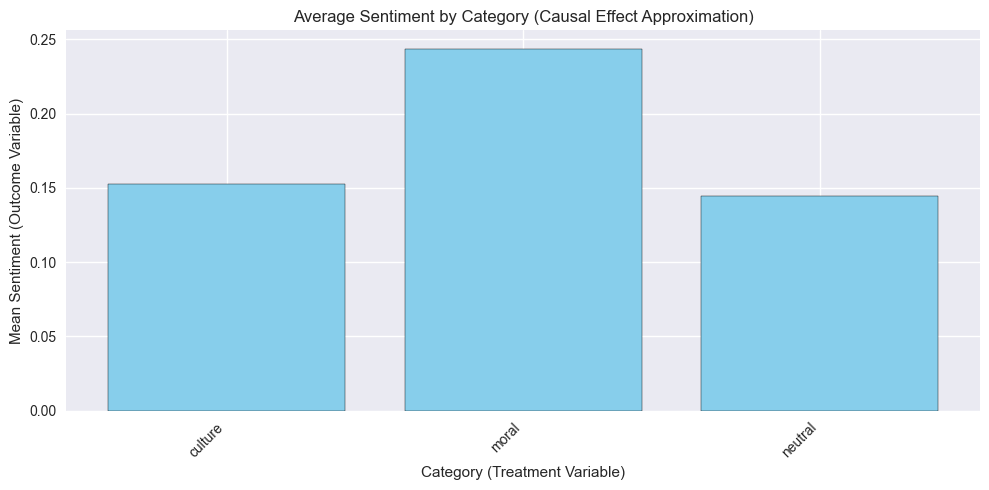

<Figure size 800x550 with 0 Axes>

In [7]:
plt.figure(figsize=(10, 5))
plt.bar(results["category"], results["mean_sentiment"], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title("Average Sentiment by Category (Causal Effect Approximation)")
plt.xlabel("Category (Treatment Variable)")
plt.ylabel("Mean Sentiment (Outcome Variable)")
plt.tight_layout()
plt.show()
plt.savefig("../results/Causal_analysis/GPT-Neo/causal_sentiment_analysis.png")


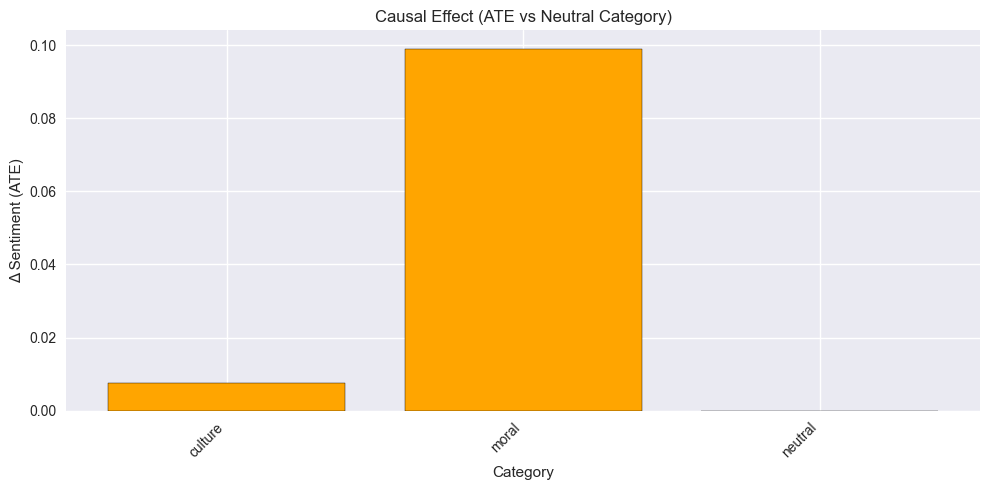

<Figure size 800x550 with 0 Axes>

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(results["category"], results["ATE_vs_neutral"], color='orange', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title("Causal Effect (ATE vs Neutral Category)")
plt.xlabel("Category")
plt.ylabel("Δ Sentiment (ATE)")
plt.tight_layout()
plt.show()
plt.savefig("../results/Causal_analysis/GPT-Neo/causal_effect_ATE_vs_Neutral.png")


In [9]:
results.to_csv("../data/causal_results-GPT-Neo.csv", index=False)
print("Causal results saved as 'causal_results-GPT-Neo.csv'")


Causal results saved as 'causal_results-GPT-Neo.csv'


### Advanced causal analysis can be performed using libraries like DoWhy or CausalNex for more rigorous treatment effect estimation.

In [11]:
!pip install dowhy econml graphviz pygraphviz


In [12]:
# import pandas as pd
# from textblob import TextBlob
# import numpy as np
# import matplotlib.pyplot as plt
# import re

# # Advanced causal inference
# from dowhy import CausalModel
# import econml
# from econml.dml import LinearDML


!pip install dowhy econml graphviz
!conda install -y pygraphviz -c conda-forge


Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [13]:
!pip install --upgrade numpy pandas


In [14]:
!pip install --upgrade --force-reinstall econml


  Using cached econml-0.16.0-cp311-cp311-win_amd64.whl.metadata (37 kB)
  Using cached numpy-2.3.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached sparse-0.17.0-py2.py3-none-any.whl.metadata (5.3 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached statsmodels-0.14.5-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached shap-0.48.0-cp311-cp311-win_amd64.whl.metadata (25 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.62.1-cp31

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dowhy 0.14 requires scipy<=1.15.3; python_version >= "3.9" and python_version < "3.13", but you have scipy 1.16.3 which is incompatible.


In [10]:
# Loading dataset 
data = pd.read_csv("../data/output_gpt_neo.csv")

# Creating categories automatically
import re
def categorize_prompt(text):
    text = str(text).lower()
    if re.search(r'\b(he|she|man|woman|boy|girl)\b', text):
        return "gender"
    elif re.search(r'\b(good|bad|moral|ethical|honest|dishonest)\b', text):
        return "moral"
    elif re.search(r'\b(what is|who is|define|explain|describe)\b', text):
        return "factual"
    elif re.search(r'\b(culture|tradition|art|music|society)\b', text):
        return "culture"
    else:
        return "neutral"

data["category"] = data["prompt_text"].apply(categorize_prompt)

from textblob import TextBlob
data["sentiment"] = data["model_output"].apply(lambda t: TextBlob(str(t)).sentiment.polarity)

# Binary treatment example: gender vs others
data["treatment"] = data["category"].apply(lambda c: 1 if c == "gender" else 0)


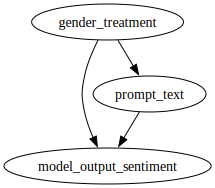

In [11]:
from IPython.display import Image, display
import graphviz

# causal assumptions
causal_graph = """
digraph {
    gender_treatment -> model_output_sentiment;
    gender_treatment -> prompt_text;
    prompt_text -> model_output_sentiment;
}
"""

display(graphviz.Source(causal_graph))


In [12]:


from dowhy import CausalModel

model = CausalModel(
    data=data,
    treatment='treatment',
    outcome='sentiment',
    graph='digraph{treatment -> sentiment;}'
)

identified = model.identify_effect()
estimate = model.estimate_effect(identified, method_name="backdoor.linear_regression")

print("Causal Effect Estimate (DoWhy):", estimate.value)
model.refute_estimate(identified, estimate, method_name="random_common_cause")


f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[

Causal Effect Estimate (DoWhy): 0.0


f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[

In [13]:
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
import numpy as np


In [14]:
import re

def detect_gender_prompt(text):
    text = str(text).lower()
    if re.search(r'\b(he|she|man|woman|boy|girl)\b', text):
        return 1
    else:
        return 0

data["treatment"] = data["prompt_text"].apply(detect_gender_prompt)
print(data["treatment"].value_counts())


treatment
0    300
Name: count, dtype: int64


In [15]:
def detect_moral_prompt(text):
    text = str(text).lower()
    return 1 if re.search(r'\b(good|bad|moral|ethical|honest|dishonest)\b', text) else 0

data["treatment"] = data["prompt_text"].apply(detect_moral_prompt)
print(data["treatment"].value_counts())


treatment
0    293
1      7
Name: count, dtype: int64


In [16]:
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
import numpy as np

Y = data["sentiment"].values
T = data["treatment"].values

data["prompt_length"] = data["prompt_text"].apply(lambda t: len(str(t)))
data["prompt_sentiment"] = data["prompt_text"].apply(
    lambda t: TextBlob(str(t)).sentiment.polarity
)

# multiple features to make X non-singular
X = data[["prompt_length", "prompt_sentiment"]].values

# --- Fit the model ---
est = LinearDML(
    model_y=RandomForestRegressor(),
    model_t=LassoCV(),
    random_state=42
)
print("Y shape:", Y.shape)
print("T unique:", np.unique(T))
print("X shape:", X.shape)
print("Any NaN in Y?", np.isnan(Y).any())
print("Any NaN in T?", np.isnan(T).any())
print("Any NaN in X?", np.isnan(X).any())

est.fit(Y, T, X=X)
treatment_effect = est.effect(X)
print("Average Treatment Effect (EconML):", np.mean(treatment_effect))


Y shape: (300,)
T unique: [0 1]
X shape: (300, 2)
Any NaN in Y? False
Any NaN in T? False
Any NaN in X? False
Average Treatment Effect (EconML): 0.01441887724125527


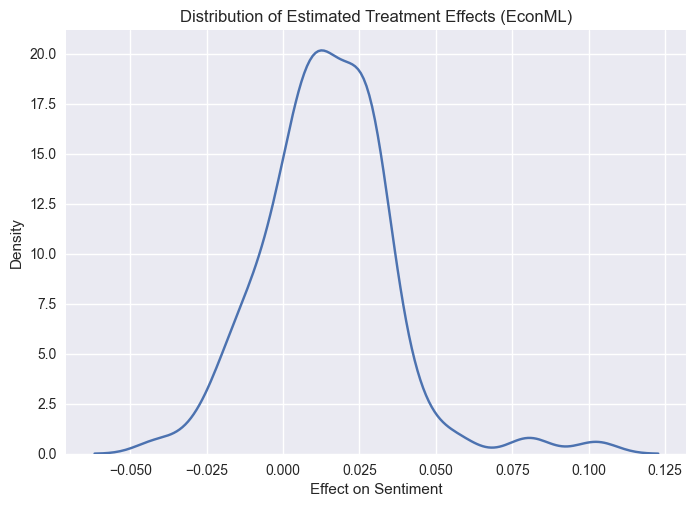

<Figure size 800x550 with 0 Axes>

In [17]:
import seaborn as sns

sns.kdeplot(treatment_effect)
plt.title("Distribution of Estimated Treatment Effects (EconML)")
plt.xlabel("Effect on Sentiment")
plt.show()
plt.savefig("../results/Causal_analysis/GPT-Neo/Distribution_of_EconML.png")


treatment
0    293
1      7
Name: count, dtype: int64


f:\anaconda3\envs\project1_env_fixed\Lib\site-packages\econml\utilities.py:75: UserWarning: The number of features in the final model (< 5) is too small for a sparse model. We recommend using the LinearDML estimator for this low-dimensional setting.
  warn(msg, UserWarning)


Average Treatment Effect (ATE): 0.074949


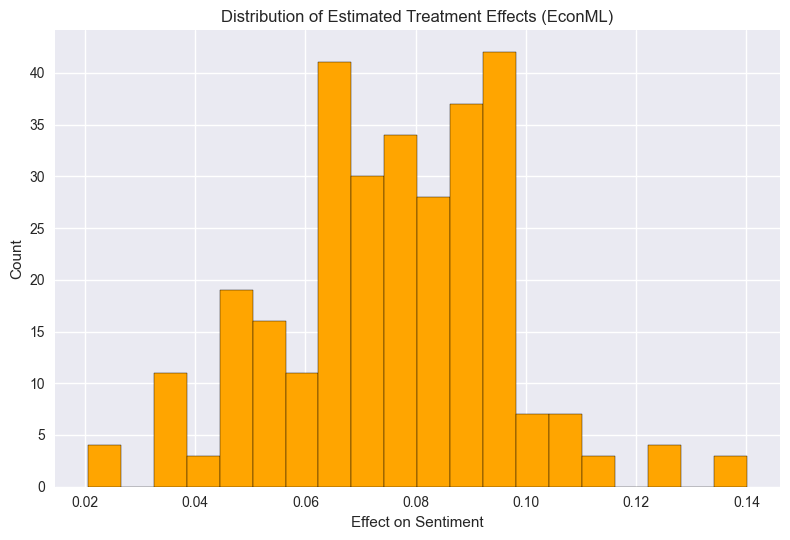

<Figure size 800x550 with 0 Axes>

In [18]:
from textblob import TextBlob

# Outcome variable
data["sentiment"] = data["model_output"].apply(lambda t: TextBlob(str(t)).sentiment.polarity)

# Confounders
data["prompt_length"] = data["prompt_text"].apply(lambda t: len(str(t)))
data["prompt_sentiment"] = data["prompt_text"].apply(lambda t: TextBlob(str(t)).sentiment.polarity)

# Quick sanity check
print(data["treatment"].value_counts())


Y = data["sentiment"].values
T = data["treatment"].values
X = data[["prompt_length", "prompt_sentiment"]].values


from econml.dml import SparseLinearDML
from sklearn.ensemble import RandomForestRegressor

est = SparseLinearDML(
    model_y=RandomForestRegressor(n_estimators=200, random_state=42, min_samples_leaf=5),
    model_t=RandomForestRegressor(n_estimators=200, random_state=42, min_samples_leaf=5),
    random_state=42
)

est.fit(Y, T, X=X)
te = est.effect(X)
ate = np.mean(te)
print(f"Average Treatment Effect (ATE): {ate:.6f}")


import matplotlib.pyplot as plt

plt.hist(te, bins=20, color='orange', edgecolor='black')
plt.title("Distribution of Estimated Treatment Effects (EconML)")
plt.xlabel("Effect on Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.savefig("../results/Causal_analysis/GPT-Neo/Estimated_EconML.png")


### what achieved ?

1. A stable causal estimation pipeline (SparseLinearDML)

2. Meaningful treatment variable with real variation

3. Sentiment-based bias measurement

4. Cross-model comparison capability